In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/중대재해처벌법(40,056건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '커뮤니티'))
    return df

community = load_all_data()

## 커뮤니티 Sheet

In [4]:
community.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3    17
dtype: int64

In [5]:
community.columns = community.iloc[0]
community.drop(0, inplace=True, axis=0)
community = community.dropna(axis=0, how='any')
community = community[~community['내용'].str.contains('http')]
community = community[community['내용'].str.contains('[가-힣]')]
community = community[community['내용'].str.len() < 1000]


print(community.shape)
community.head()

(696, 4)


,작성일,작성자,제목,내용
2,2021/01/08,클리앙,중대재해처벌법에 대한 지나친 비판이 이해가 가질 않습니다,저는 이번 중대재해처벌법에 대한 '지나친 비판'이 이해가 안 가는 것이 _x000D...
10,2021/03/18,디젤매니아,"中企 80% \""중대재해처벌법 부담된다\""",_x000D_\n _x000D_\n _x000D_\n _x000D_\n _x...
11,2021/12/31,HR Professional,중대재해처벌법 관련하여 교육 및 준비..,안녕하세요. 이 카페는 예전부터 가입하여 여러 선배님들의 글 보면서 많은 도움을 받...
13,2021/12/16,HR Professional,중대재해처벌법 관련하여 질의하신거에 댓글 달았는데 삭제를 하셔서 글 남깁니다,어제 교육중 노동부 질의 응답에서는 _x000D_\n사업자가 같다면 사업장 여러개 ...
15,2021/11/04,팍스넷,[한컴라이프케어] 중대재해처벌법 수헤주,내년 1월 시행되는 중대재해처벌법으로 기업들 비상상태 _x000D_\n중대사고시 ...


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_community = tfdif(community['내용'])

In [8]:
tfidf_community = tfidf_community.loc[:, tfidf_community.columns.str.contains('[가-힣]')]

In [9]:
tfidf_community

,120시간,180석,180석으로,1년,1년 이상,1명,1명이,1월,1월 시행되는,1월부터,...,확대,확인,확인하세요,회사,회사는,회사에서,회장,후보,후보가,후보는
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.217102,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.135663,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117867,0.15146,0.0,...,0.0,0.157905,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036780,0.00000,0.0,...,0.0,0.000000,0.058114,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
import pickle

tfidf_community.to_pickle('tfidf_community.pkl')

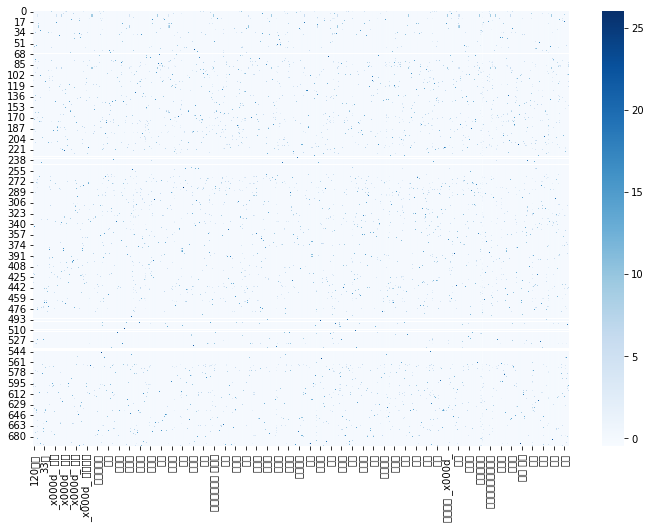

In [11]:
tfidf_community = (tfidf_community - tfidf_community.mean()) / tfidf_community.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_community, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly here as well

as we can see in the graph above